In [3]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm


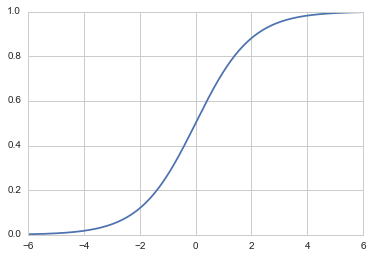

In [2]:
def logistic(t):
    return 1.0/(1+math.exp(-1.0*t))
t = np.linspace(-6,6,500)
#list comprehension
y=np.array([logistic(ele) for ele in t])

plt.plot(t,y)

In [6]:
df = sm.datasets.fair.load_pandas().data

In [8]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [7]:
df['Had_affair'] = df['affairs'].apply(affair_check)

In [11]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [12]:
df.groupby('Had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


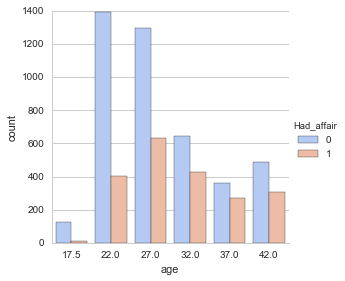

In [15]:
sns.factorplot('age',data=df,hue='Had_affair',palette='coolwarm',kind='count')

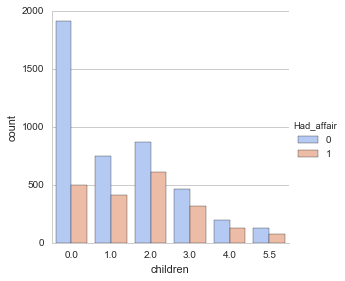

In [17]:
sns.factorplot('children',data=df,hue='Had_affair',palette='coolwarm',kind='count')

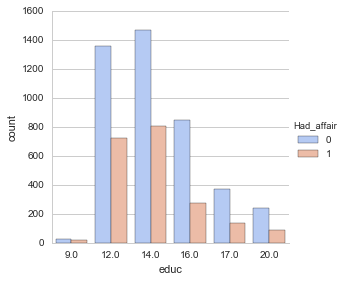

In [18]:
sns.factorplot('educ',data=df,hue='Had_affair',palette='coolwarm',kind='count')

In [8]:
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])


occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [10]:
X = df.drop(['occupation','occupation_husb','Had_affair'],axis=1)

In [11]:
# Concat the dummy DataFrames Together
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [12]:
# Now Concat the X DataFrame with the dummy variables
X = pd.concat([X,dummies],axis=1)

X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
#Set Y as target class
Y = df.Had_affair

Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_affair, dtype: int64

Multicollinearity: This is because the dummy variables are highly correlated, our model begins to get distorted 
because one of the dummy variables can be linearly predicted from the others. We take care of this problem by dropping one of the dummy variables from each set, we do this at the cost of losing a data set point.

In [16]:
X = X.drop('hocc1',axis=1)
#Drops columns to avoid multicollinearity 

In [18]:
X = X.drop('affairs',axis=1)
#Drops affairs columns

Y must be a one dimensional array to work with scikit learn

In [19]:
#Flattens array, returns 1d array

Y = np.ravel(Y)

Y

array([1, 1, 1, ..., 0, 0, 0])

In [20]:
log_model = LogisticRegression()
#Fit data
log_model.fit(X,Y)

#Check accuracy
log_model.score(X,Y)

0.72588752748978946

In [21]:
Y.mean()

0.32249450204209867

In [23]:
# Use zip to bring the column names 
#np.transpose function to bring together the coefficients from the model
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))
coeff_df

,0,1
0,rate_marriage,[-0.697845453825]
1,age,[-0.0563368031972]
2,yrs_married,[0.103893444136]
3,children,[0.0181853982481]
4,religious,[-0.368506616998]
5,educ,[0.00864804494766]
6,occ2,[0.298118794658]
7,occ3,[0.608150180777]
8,occ4,[0.346511273036]
9,occ5,[0.942259498161]


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

log_model2 = LogisticRegression()

log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
#Predict classes of the training data set
class_predict = log_model2.predict(X_test)
#Compare the predicted score to actual
print metrics.accuracy_score(Y_test,class_predict)

0.709798994975
